<br>
<! Esto es un comentario en HTML
<! <img align="center" src="imagenes/logo.png"  width="200" height="141">
<font size=36><center> Machine Learning con Python </center> </font>
<br>



<h1 align='center'> Modulo IV: Machine Learning </h1>
<h2 align='center'>  Evaluación de Modelos de Clasificación </h2>

# Introducción
En esta sección veremos un conjunto de métricas que nos permitirán evaluar un modelo de clasificación, de tal manera que podamos comprar con otros modelos, hacer ajustes, tomar decisiones, etc.

# Tasas de clasificación de un modelo

### Exactitud (Accuracy)

En un modelo de clasificación binaria tenemos cuatro posibles resultados a la hora de clasificar. Supongamos que tenemos una clase $C$ y queremos determinar la pertenencia o no a dicha clase, entonces tendremos los posibles resultados:

* **Verdaderos Positivos (True positives):** Son aquellas observaciones que pertenecen a la clase $C$ y que el modelo acierta identificando que pertenece a la clase $C$.


* **Falsos Positivos (False positives):** Son aquellas observaciones que no pertenecen a la clase $C$, pero sin embargo el modelo determina que si pertenecen a esta.


* **Verdaderos Negativos (True negatives):**  Son aquellas observaciones que no   pertenecen a la clase $C$ y el modelo determina que no pertenecen a la clase $C$.


* **Falsos Negativos (False negatives):** Son aquellos casos en los que las observaciones pertenecen a la clase $C$ y el modelo determina que no pertenece a la clase $C$.


La **exactitud** es una medida general de cómo se comporta el modelo, mide el porcentaje de casos que han clasificados correctamente. Viene dado por la siguiente relación:

$$ \mbox{Exactitud} = \frac{\mbox{Nro de observaciones clasificadas correctamente}}{\mbox{Nro total de observaciones}} = \frac{VP+VN}{VP+VN+FP+FN}$$

### Precisión (Precission)

La precisión de un modelo viene dada por su capacidad de identificar a los modelos que pertenecen a una clase, en este caso la precisión se determina de la siguiente forma:

$$\mbox{Precisión} = \frac{\mbox{Nro de observaciones positivas clasificadas correctamente}}{\mbox{Nro de observaciones clasificadas como positivas}} = \frac{VP}{VP+FP}$$

### Sensibilidad

La sensibilidad nos da una medida de la habilidad del modelo para encontrar todos los valores perteneciente a una clase. La sensibilidad se mide en función de una clase.

$$\mbox{Sensibilidad} = \frac{\mbox{Nro de observaciones positivas clasificadas correctamente}}{\mbox{Nro de observaciones positivas totales}} = \frac{VP}{VP+FN}$$

### Matriz de Confusión

La **matriz de confusión** contabiliza y agrupa cómo han sido clasificadas las observaciones por el modelo.

$$\left(\begin{array}{cc} VP & FP \\ FN & VN \end{array}\right)$$

### F1 score

Esta medida se define como la media armónica de la precisión y la sensibilidad, esto es:

$$\mbox{f1 score} = 2\frac{1}{\frac{1}{\mbox{precisión}}+ \frac{1}{\mbox{sensibilidad}}} = 2\frac{(precisión)(sensibilidad)}{precisión + sensibilidad}$$

# **Ejercicio 1**

Tome el conjunto de datos `load_breast_cancer` de `sklearn` y entrene un modelo de regresión logística (Clasificador), utilice como features los proporcionados por la librería, análogamente utilice el target que proporciona la librería. Evalúe algunas métricas de desempeño para esta regresión.

# **Solución**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

In [2]:
datos = load_breast_cancer()

In [3]:
X=datos.data #features
y=datos.target #target

In [4]:
# Cambiamos los valores, positivo para cancer entonces 1, Negativo para cancer entonces 0
y_new = np.array([1 if val==0 else 0 for val in y])

In [5]:
# Construimos un DataFrame con las caracteristicas
df = pd.DataFrame(data=X,columns=list(datos.feature_names))

In [6]:
df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [7]:
# Agregamos al DataFrame la variable objetivo
df['target']=y_new

In [8]:
# Dividimos nuestros datos en entrenamiento y prueba
xtrain, xtest, ytrain, ytest = train_test_split(X, y_new, test_size=0.3, random_state=42)

Dado que estamos trabajando con variables numéricas y deseamos tener una correcta interpretación de la comparación entre estas, necesitamos escalarlas, para esto podemos usar `MinMaxScaler()`

In [9]:
scaler = MinMaxScaler()

El siguiente paso será escalar nuestros datos de entrenamiento y de test

In [10]:
xtrain_normal=scaler.fit_transform(xtrain)
xtest_normal = scaler.fit_transform(xtest)

Debemos luego especificar el modelo que vamos a utilizar, en este caso una regresión logistica

In [11]:
modelo = LogisticRegression()

Luego entrenamos nustro modelo con los datos

In [12]:
modelo.fit(xtrain_normal,ytrain)

LogisticRegression()

Estamos listos para predecir

In [13]:
y_pred = modelo.predict(xtest_normal)

Nuestro resultado

In [14]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0])

In [15]:
len(y_pred)

171

#### **Evaluemos algunas métricas de desempeño**

In [16]:
# La matriz de confusion
MC = metrics.confusion_matrix(ytest,y_pred,labels=[0,1])
print(MC)

[[100   8]
 [  1  62]]


In [17]:
#Exactitud mide el porcentaje de datos que se han clasificado correctamente
metrics.accuracy_score(ytest,y_pred)

0.9473684210526315

In [18]:
#Precision mide la capacidad del modelo de identificar que un dato pertenece a una clase
metrics.average_precision_score(ytest,y_pred)

0.8775032820145602

In [19]:
#Sensibilidad mide la habilidad del modelo para encontrar todos los datos que pertenecen a una clase
metrics.recall_score(ytest,y_pred)

0.9841269841269841

In [20]:
# Media armonica de la precision y la sensibilidad
metrics.f1_score(ytest,y_pred)

0.9323308270676691

# **Ejercicio 2**

Use el conjunto de datos `Social_Network_Ads.csv` y de este tome como caracteristicas `Age` y `EstimatedSalary`. Use como target la variable `Purcheased` la cual indica si un usuario pagó no no por un servicio

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [22]:
df = pd.read_csv('Social_Network_Ads.csv')

In [23]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [24]:
np.average(df.Purchased)

0.3575

El 35% de la poblacion compró, es importante ver la proporción para que el modelo no tenga problemas a la hora de predecir, esto nos ayuda a evitar overfitting por ejemplo. Luego convertimos en arrays nuestras features y nuestra target

In [25]:
#x1=df[['Age','EstimatedSalary']]
x=df.iloc[:,[2,3]].values
y=df.iloc[:,4].values

Dividimos el conjunto de datos

In [26]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2)

Estandarizamos las variables numéricas con `StandardScaler()`

In [27]:
standard_x = StandardScaler()
x_train_f = standard_x.fit_transform(x_train)
x_test_f = standard_x.fit_transform(x_test)

Importamos nuestro modelo y luego lo entrenamos con nuestros datos

In [28]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(random_state = 0)
reg.fit(x_train_f,y_train)

#Predicción
pred = reg.predict(x_test_f)

A continuación podemos ver qué tan bien predice nuestro modelo en comparación con los datos de test

In [29]:
pred,y_test

(array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
        0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
        0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 1, 0, 0, 1, 1, 0]),
 array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
        0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
        0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
        1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 1, 0, 0, 1, 1, 0]))

Y por último podemos usar un mapa de color para visualizar la clasificación

<ipython-input-30-c2bdba9152be>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


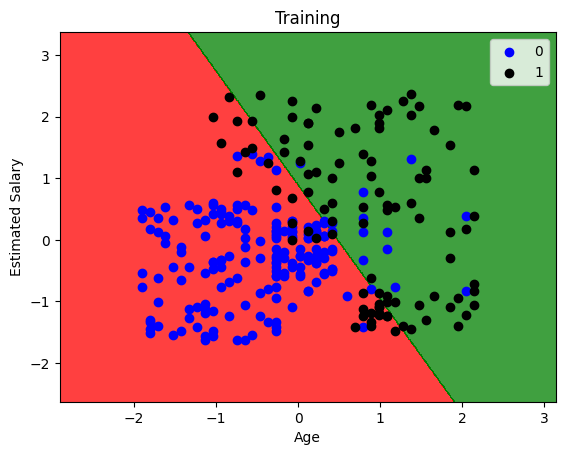

In [30]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
X_set, y_set = x_train_f, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, reg.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'black'))(i), label = j)
plt.title('Training')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Creamos un nuevo DataFrame para ver las predicciones comparadas con el test

In [33]:
predicciones = pd.DataFrame(data=x_test,columns=['Age','EstimatedSalary'])

In [34]:
predicciones['y_test'] = y_test

In [35]:
predicciones['y_pred'] = pred

In [36]:
predicciones.loc[4:10]

,Age,EstimatedSalary,y_test,y_pred
4,54,70000,1,1
5,47,20000,1,0
6,23,82000,0,0
7,28,32000,0,0
8,40,60000,0,0
9,36,126000,1,1
10,24,23000,0,0


Ahora intentemos una nueva predicción pasandole los parámetros a las variables de edad y salario estimado

In [40]:
nuevo=[54,70000]
nuevo_escalado = standard_x.transform([nuevo])
n_pred=reg.predict(nuevo_escalado)
print(f"El valor predicho es: {n_pred[0]}")

El valor predicho es: 1


# **Ejercicio 3**

Tome el conjunto de datos anterior y además involucre como feature la variable `Gender`, es decir, debes tomar una variable categórica. Lo que tenemos que hacer para resolver este problema es convertirla a numérica.

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [42]:
df = pd.read_csv('Social_Network_Ads.csv')

Debemos separar el conjunto de datos en las variables numéricas y las categóricas

In [43]:
data_str = df.select_dtypes(include=['object'])
data_num = df.select_dtypes(exclude=['object'])

Aplicamos el método `get_dummies` de pandas para codificarlas en binario `1` para categoría `Male` y `0` para categoría `Female`. Eliminamos la primera de estas categorías, dado que si una de las variables está en `1` la otra estará en `0`

In [44]:
#data_encode = pd.get_dummies(data_str)
data_encode = pd.get_dummies(data_str,drop_first = True)

Ahora concatenamos los resultados

In [45]:
df_listo = pd.concat([data_num,data_encode],axis=1)

In [46]:
df_listo.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


Estamos listos para entrenar nuevamente el algoritmo de clasificación

In [47]:
#x=df_listo[['Age','EstimatedSalary','Gender_Female','Gender_Male']].values
x=df_listo[['Age','EstimatedSalary','Gender_Male']].values
y=df_listo['Purchased'].values

In [48]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2)

In [49]:
standard_x = StandardScaler()
x_train_f = standard_x.fit_transform(x_train)
x_test_f = standard_x.fit_transform(x_test)

In [50]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(random_state = 0)
reg.fit(x_train_f,y_train)

#Predicción
pred = reg.predict(x_test_f)

In [51]:
pred,y_test

(array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
        0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
        0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 1, 0, 0, 1, 1, 0]),
 array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
        0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
        0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
        1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 1, 0, 0, 1, 1, 0]))

In [52]:
#predicciones = pd.DataFrame(data=x_test,columns=['Age','EstimatedSalary','Gender_Female','Gender_Male'])
predicciones = pd.DataFrame(data=x_test,columns=['Age','EstimatedSalary','Gender_Male'])
predicciones['y_test'] = y_test
predicciones['y_pred'] = pred
predicciones.loc[4:10]

,Age,EstimatedSalary,Gender_Male,y_test,y_pred
4,54,70000,1,1,1
5,47,20000,1,1,0
6,23,82000,0,0,0
7,28,32000,1,0,0
8,40,60000,0,0,0
9,36,126000,0,1,1
10,24,23000,1,0,0


In [53]:
df.loc[4:10]

,User ID,Gender,Age,EstimatedSalary,Purchased
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0
10,15570769,Female,26,80000,0


Ahora le pasamos a nuestro modelo datos nuevos, recordando que `1` es para `Male` y `0` es para `Female`

In [54]:
nuevo=[25,33000,1]
nuevo_escalado = standard_x.transform([nuevo])
n_pred=reg.predict(nuevo_escalado)
print(f"El valor predicho es: {n_pred[0]}")

El valor predicho es: 0
